In [247]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn import OneHotEncoder


from layer import HiddenLayer
from activations import *
from losses import *
from network import Network
from regularizers import *
from utils import *

random.seed(42)
np.random.seed(42)

## Additional Variable Information
    1. class: 0, 1 
    2. a1:    1, 2, 3
    3. a2:    1, 2, 3
    4. a3:    1, 2
    5. a4:    1, 2, 3
    6. a5:    1, 2, 3, 4
    7. a6:    1, 2
    8. Id:    (A unique symbol for each instance)

In [248]:
names = ['target', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'id']
df_train = pd.read_csv('./data/monk/monks-1.train', sep=' ', skipinitialspace=True, names=names).drop(["id"], axis=1)
df_train


,target,x1,x2,x3,x4,x5,x6
0,1,1,1,1,1,3,1
1,1,1,1,1,1,3,2
2,1,1,1,1,3,2,1
3,1,1,1,1,3,3,2
4,1,1,1,2,1,2,1
...,...,...,...,...,...,...,...
119,1,3,3,2,1,4,2
120,1,3,3,2,3,1,2
121,1,3,3,2,3,2,2
122,1,3,3,2,3,3,2


In [249]:
df_test = pd.read_csv("./data/monk/monks-1.test", sep=' ', skipinitialspace=True, names=names).drop(["id"], axis=1)
df_test

,target,x1,x2,x3,x4,x5,x6
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,2
2,1,1,1,1,1,2,1
3,1,1,1,1,1,2,2
4,1,1,1,1,1,3,1
...,...,...,...,...,...,...,...
427,1,3,3,2,3,2,2
428,1,3,3,2,3,3,1
429,1,3,3,2,3,3,2
430,1,3,3,2,3,4,1


In [250]:
# do the one hot encoding of inputs over 17 classes
y_train = df_train["target"]
y_train = y_train.values

X_train = pd.get_dummies(df_train, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6']).drop(["target"], axis=1)
X_train = X_train.values
# change input fron True/False to 1/0
X_train = X_train.astype(int)

In [251]:
X_train.shape = (len(X_train), 17, 1)
y_train.shape = (len(y_train), 1, 1)

print(X_train.shape)
print(y_train.shape)

(124, 17, 1)
(124, 1, 1)


In [252]:
# do the one hot encoding of inputs over 17 classes
y_test = df_test["target"]
y_test = y_test.values

X_test = pd.get_dummies(df_test, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6']).drop(["target"], axis=1)
X_test = X_test.values
# change input fron True/False to 1/0
X_test = X_test.astype(int)

In [253]:
X_test.shape = (len(X_test), 17, 1)
y_test.shape = (len(y_test), 1, 1)

print(X_test.shape)
print(y_test.shape)

(432, 17, 1)
(432, 1, 1)


In [254]:
net = Network(MSE(1))

net.add_layer(input_size=len(X_train[0]), units_size=4, starting=Range_random(), activation=ReLU())
net.add_layer(input_size=4, units_size=1, starting=Range_random(), activation=Sigmoid())

In [255]:
out = net.forward(X_train[0])

In [256]:
y_train[0].shape

(1, 1)

In [257]:
loss = net.loss.forward(y_pred=out, y_true=y_train[0])
loss

0.07890323897012237

In [258]:
net.backward(net.loss.backward(y_pred=out, y_true=y_train[0]))

In [259]:
out = net.forward(X_train[0])
loss = net.loss.forward(y_pred=out, y_true=y_train[0])
loss

0.07169786101833625

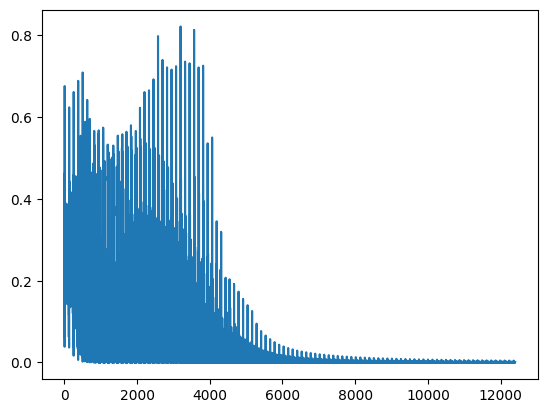

In [260]:
# loop over all the training set
losses = []
for i in range(100):
    for i in range(len(X_train)):
        out = net.forward(X_train[i])
        loss = net.loss.forward(y_pred=out, y_true=y_train[i])
        net.backward(net.loss.backward(y_pred=out, y_true=y_train[i]))
        losses.append(loss)
        
# plot the loss
plt.plot(losses)
plt.show()

In [261]:
# test the network
y_pred = []
for i in range(len(X_test)):
    out = net.forward(X_test[i])
    y_pred.append(out)

y_pred = np.array(y_pred)

y_pred = y_pred.reshape(len(y_pred), 1)
y_test1 = y_test.copy()
y_test1 = y_test1.reshape(len(y_test1), 1)

print(y_test.shape)

for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

# check the accuracy in percentage
accuracy = np.sum(y_pred == y_test1) / len(y_test1) * 100
print("Accuracy of the model is: ", accuracy, "%")
    





(432, 1, 1)
Accuracy of the model is:  100.0 %


# plotting the acc over epochs

In [262]:
net = Network(MSE(1))

net.add_layer(input_size=len(X_train[0]), units_size=4, starting=Range_random(), activation=ReLU())
net.add_layer(input_size=4, units_size=1, starting=Range_random(), activation=Sigmoid())
accs = []

In [263]:
def acc():
    y_pred = []
    for i in range(len(X_test)):
        out = net.forward(X_test[i])
        y_pred.append(out)

    y_pred = np.array(y_pred)

    y_pred = y_pred.reshape(len(y_pred), 1)
    y_test1 = y_test.copy()
    y_test1 = y_test1.reshape(len(y_test1), 1)

    for i in range(len(y_pred)):
        if y_pred[i] > 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0

    # check the accuracy in percentage
    accuracy = np.sum(y_pred == y_test1) / len(y_test1) * 100
    accs.append(accuracy)
    
    #print("Accuracy of the model is: ", accuracy, "%")

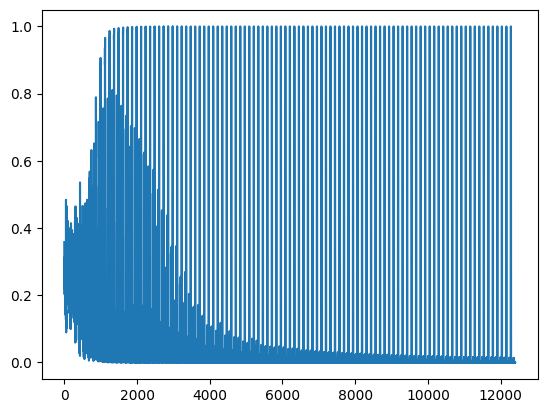

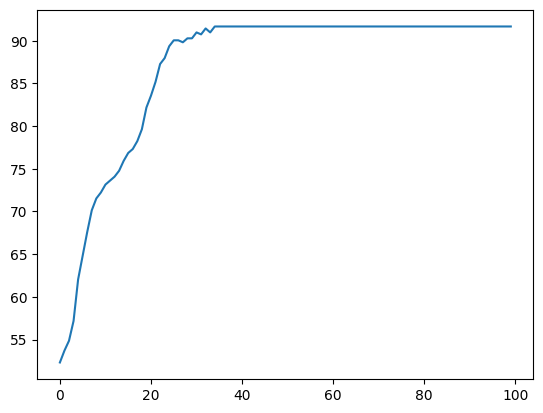

In [264]:
# loop over all the training set
losses = []
for i in range(100):
    for i in range(len(X_train)):
        out = net.forward(X_train[i])
        loss = net.loss.forward(y_pred=out, y_true=y_train[i])
        net.backward(net.loss.backward(y_pred=out, y_true=y_train[i]))
        losses.append(loss)
    acc()
        
# plot the loss and accuracy
plt.plot(losses)
plt.show()
plt.plot(accs)
plt.show()
